# Importing necessary packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Loading data set

In [2]:
df_skw_co = pd.read_csv(r"C:\Users\User\BankCurupt\skw_coret_cln_bank.csv",sep = ',')

In [3]:
df_skw_co.columns

df_skw_co.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.834118,0.031094,0.978440,0.017617,0.741344,0.875099,0.322983,0.011637,0.013458,0.750816,...,0.995314,0.756469,0.009528,0.088799,0.003655,0.013877,0.016297,0.012654,0.277543,0
1,0.830318,0.035191,0.978221,0.016544,0.741265,0.873559,0.322530,0.011069,0.011092,0.750745,...,0.995311,0.755852,0.009532,0.088799,0.002015,0.009195,0.017675,0.008230,0.277490,0
2,0.835345,0.024954,0.980172,0.025679,0.741636,0.873560,0.323122,0.014547,0.015327,0.751664,...,0.995322,0.756308,0.009482,0.088799,0.002602,0.010925,0.015979,0.015947,0.278090,0
3,0.834666,0.037560,0.977635,0.014879,0.741095,0.873560,0.323050,0.010558,0.014099,0.750486,...,0.995352,0.756829,0.009456,0.088912,0.002859,0.013745,0.016553,0.011177,0.277513,0
4,0.831538,0.028123,0.978924,0.019947,0.741467,0.874206,0.322672,0.012643,0.013307,0.751112,...,0.995307,0.755990,0.009555,0.088799,0.002985,0.012217,0.016158,0.013799,0.277552,0


# finding correlation 

In [4]:
cor_va = df_skw_co.corr()

print(cor_va)

           Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
Attr1   1.000000 -0.402451  0.445954  0.353987  0.248595  0.352221  0.990038   
Attr2  -0.402451  1.000000 -0.674794 -0.767921 -0.443321 -0.335614 -0.400809   
Attr3   0.445954 -0.674794  1.000000  0.832420  0.499594  0.243293  0.451828   
Attr4   0.353987 -0.767921  0.832420  1.000000  0.532188  0.189013  0.355938   
Attr5   0.248595 -0.443321  0.499594  0.532188  1.000000  0.146317  0.249944   
Attr6   0.352221 -0.335614  0.243293  0.189013  0.146317  1.000000  0.355067   
Attr7   0.990038 -0.400809  0.451828  0.355938  0.249944  0.355067  1.000000   
Attr8   0.322322 -0.921985  0.597363  0.821090  0.440367  0.229393  0.320750   
Attr9   0.232516  0.109372  0.090816 -0.041007  0.067417 -0.164057  0.238692   
Attr10  0.437217 -0.971400  0.683561  0.714873  0.433799  0.339977  0.434861   
Attr11  0.955141 -0.329324  0.414400  0.317581  0.227165  0.296791  0.967341   
Attr12  0.754900 -0.589505  0.507212  0.

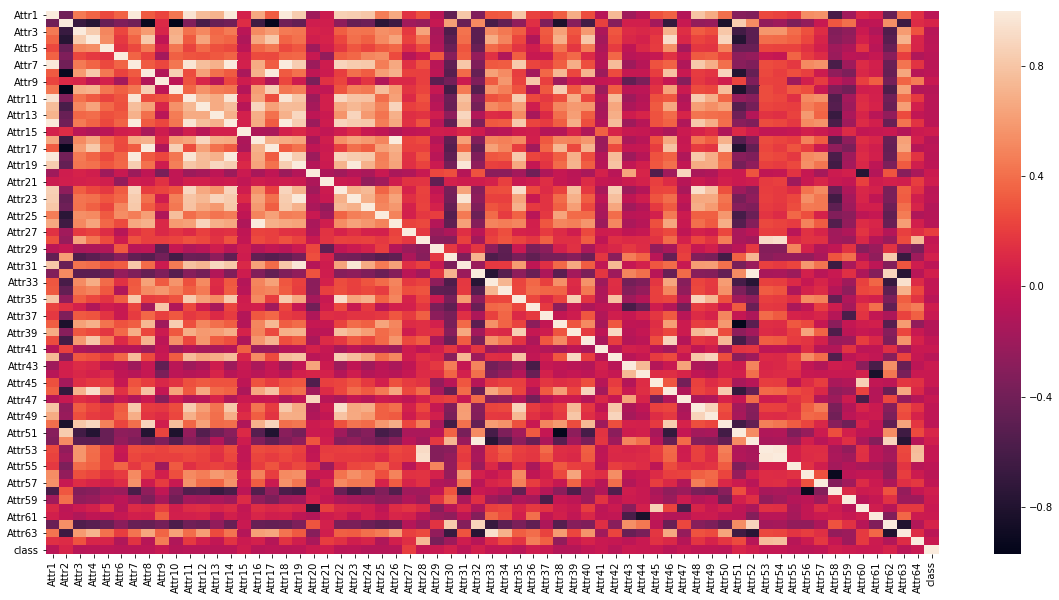

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(cor_va)

In [6]:
corr_matrix = df_skw_co.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


In [7]:
to_drop

['Attr7',
 'Attr10',
 'Attr11',
 'Attr14',
 'Attr17',
 'Attr18',
 'Attr23',
 'Attr26',
 'Attr31',
 'Attr52',
 'Attr54']

In [8]:
###droping higly corelated variables

df_fi = df_skw_co.drop(df_skw_co[to_drop], axis=1)

In [9]:
df_fi.shape

(10083, 54)

# Assigning data features to X ,and Target class to y

In [10]:

x = df_fi.iloc[:,0:53]

x.head()

y = df_fi.iloc[:,53]

y.value_counts()


0    9685
1     398
Name: class, dtype: int64

In [11]:
x.shape

(10083, 53)

# Train Test split

In [14]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 42)


In [17]:
x_train.shape

(7058, 53)

In [18]:
x_test.shape

(3025, 53)

In [19]:
y_train.value_counts()

0    6775
1     283
Name: class, dtype: int64

In [20]:
print("label\tcount")
print(y_test.value_counts())

label	count
0    2910
1     115
Name: class, dtype: int64


In [21]:
y_test.shape[0]

3025

# support Vector machine

In [22]:
from sklearn import svm

In [23]:
model_svm = svm.SVC(verbose=True,probability=True,gamma='scale',kernel='linear')

In [24]:
model_svm.fit(x_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [25]:
y_predicted = model_svm.predict(x_test)

# Confusion matrix and classification report

In [26]:

print(classification_report(y_test, y_predicted))

cm=confusion_matrix(y_test, y_predicted)
print(cm)
print(accuracy_score(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2910
           1       0.00      0.00      0.00       115

   micro avg       0.96      0.96      0.96      3025
   macro avg       0.48      0.50      0.49      3025
weighted avg       0.93      0.96      0.94      3025

[[2910    0]
 [ 115    0]]
0.9619834710743802


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
y_pred=pd.Series(y_predicted)

# printing the size of predicted data set and test data

In [28]:
print("label\tcount")
print(y_pred.value_counts())

label	count
0    3025
dtype: int64


In [29]:
print("label\tcount")
print(y_test.value_counts())

label	count
0    2910
1     115
Name: class, dtype: int64


# AUC ROC curve

In [30]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_svm.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


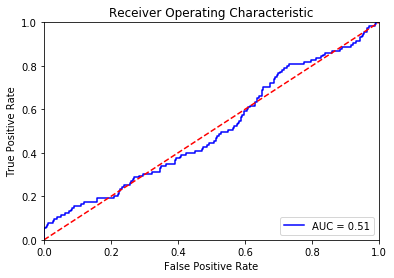

In [31]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [32]:
print("roc score = ",roc_auc)

roc score =  0.5053578365456447


In [33]:
gini = (2*roc_auc)-1

In [34]:
print("Gini score = ",gini)

Gini score =  0.010715673091289402


In [35]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_predicted)

0.0

In [36]:
confi_lvl = model_svm.predict_proba(x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F957C8278>,
      dtype=object)

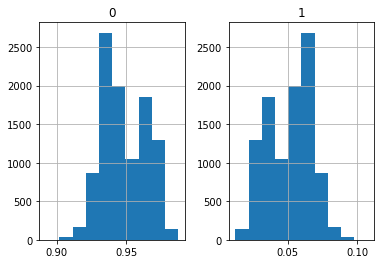

In [37]:
confi_lvl = pd.DataFrame(confi_lvl)
confi_lvl.hist()

In [38]:
feature_importance = abs(model_svm.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

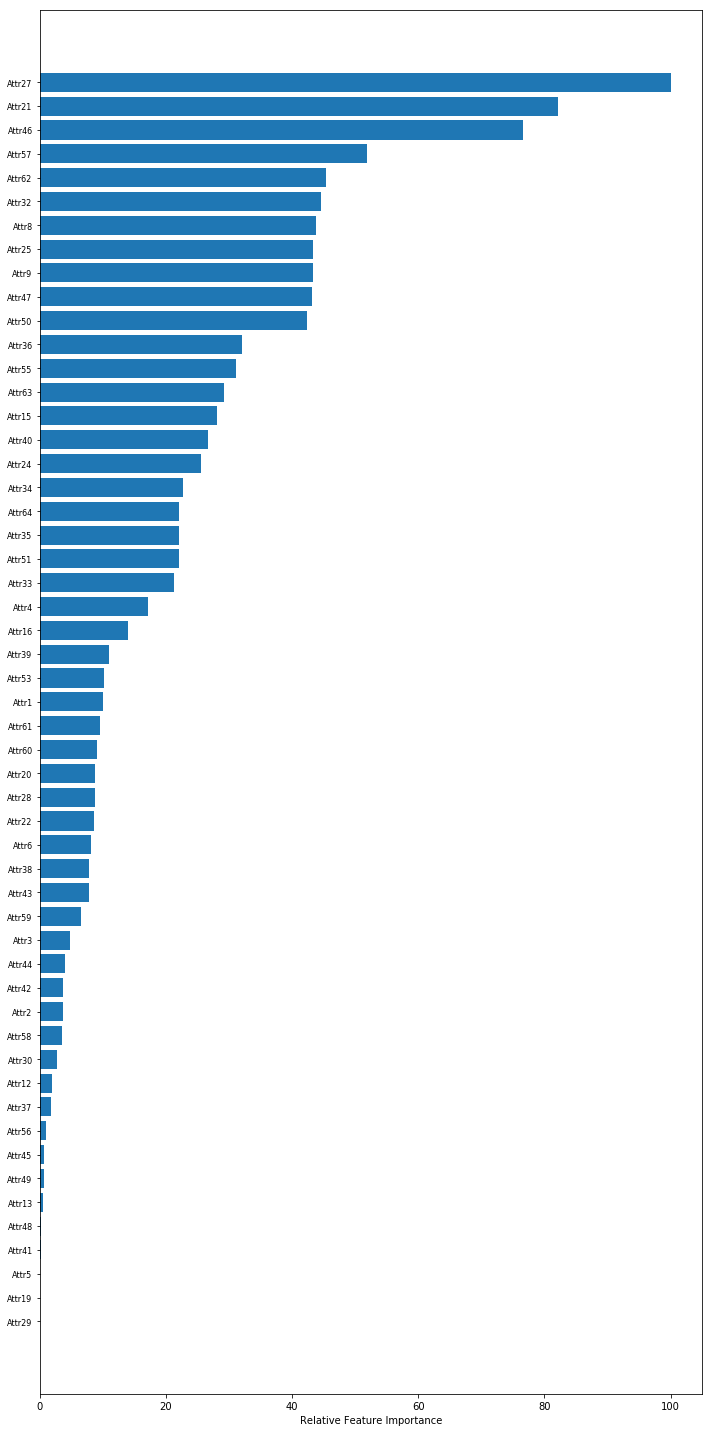

In [39]:
featfig = plt.figure(figsize=(10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()